## Developing a method to identify images that only include vegetation and landscape

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import numpy as np
import exifread
import glob, os
import shutil
import PIL

/Users/Mehdi/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
files = glob.glob("/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/Negatives/*.JPG")
num=len(files)
filepos = glob.glob("/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/Positives/*.JPG")
numpos=len(filepos)

In [4]:
dates=np.array([])
lat=np.array([])
lon=np.array([])
flash=np.array([])
lightsource=np.array([])
colorspace=np.array([])
# Open image file for reading (binary mode)
for i in range(num): 
    f = open(files[i], 'rb')
    tags = exifread.process_file(f)
    dates=np.append(dates,str(tags['EXIF DateTimeOriginal']).split()[0])
    lat= np.append(lat,str(tags['GPS GPSLatitude']))
    lon= np.append(lon,str(tags['GPS GPSLongitude']))
    flash=np.append(flash,str(tags['EXIF Flash']))
    lightsource=np.append(lightsource,str(tags['EXIF LightSource']))
    colorspace=np.append(colorspace,str(tags['EXIF ColorSpace']))
    #print tags['EXIF LightSource']
    #print tags['GPS GPSLatitude']
    #print tags['EXIF ColorSpace']
    #print tags['GPS GPSLongitude']
    #print tags['EXIF DateTimeOriginal']
    #print tags['EXIF Flash']
    #print dates[i]

In [5]:
datepos=np.array([])
latpos=np.array([])
lonpos=np.array([])
flashpos=np.array([])
lightsourcepos=np.array([])
colorspacepos=np.array([])
# Open image file for reading (binary mode)
for i in range(numpos): 
    f = open(filepos[i], 'rb')
    tagpos = exifread.process_file(f)
    datepos=np.append(datepos,str(tagpos['EXIF DateTimeOriginal']).split()[0])
    latpos= np.append(latpos,str(tagpos['GPS GPSLatitude']))
    lonpos= np.append(lonpos,str(tagpos['GPS GPSLongitude']))
    flashpos=np.append(flashpos,str(tagpos['EXIF Flash']))
    lightsourcepos=np.append(lightsourcepos,str(tagpos['EXIF LightSource']))
    colorspacepos=np.append(colorspacepos,str(tagpos['EXIF ColorSpace']))

In [6]:
uni_lightsource =np.unique(lightsource)
uni_colorspace =np.unique(colorspace)
uni_flash =np.unique(flash)
uni_lon =np.unique(lon)
uni_lat =np.unique(lat)

uni_lightsourcepos =np.unique(lightsourcepos)
uni_colorspacepos =np.unique(colorspacepos)
uni_flashpos =np.unique(flashpos)
uni_lonpos =np.unique(lonpos)
uni_latpos =np.unique(latpos)
uni_latpos

array(['[37, 31, 35]'], 
      dtype='|S32')

In [7]:
uniquedate =np.unique(dates)
print uniquedate
num_unique=np.zeros(len(uniquedate))
for i in range(len(uniquedate)):
    num_unique[i]=len(np.where(dates== uniquedate[i])[0])
num_unique

['2014:11:12' '2014:11:14' '2014:11:15' '2014:11:16' '2014:11:17'
 '2014:11:18' '2014:11:21' '2014:11:22' '2014:11:23' '2014:11:24'
 '2014:11:25' '2014:11:26' '2014:11:27' '2014:11:28' '2014:11:30'
 '2014:12:01' '2014:12:05' '2014:12:06' '2014:12:11' '2014:12:13'
 '2014:12:14' '2014:12:15' '2014:12:16' '2014:12:26']


array([  7.92000000e+02,   4.00000000e+00,   3.84000000e+02,
         1.50000000e+02,   7.14000000e+02,   1.19000000e+02,
         2.10000000e+01,   1.80000000e+01,   1.05000000e+02,
         3.76000000e+02,   3.81000000e+02,   1.08000000e+02,
         4.50000000e+01,   4.22000000e+02,   3.00000000e+00,
         9.00000000e+00,   2.00000000e+00,   3.00000000e+00,
         9.00000000e+00,   8.10000000e+01,   3.21300000e+03,
         1.86000000e+02,   7.80000000e+01,   1.00000000e+00])

In [8]:
uniquedatepos =np.unique(datepos)
num_uniquepos=np.zeros(len(uniquedatepos))
for i in range(len(uniquedatepos)):
    num_uniquepos[i]=len(np.where(datepos== uniquedatepos[i])[0])
num_uniquepos

array([  1.,   3.,   6.,   3.,   9.,  14.,   3.,  24.,  12.,   1.,   3.,
         6.,   7.])

In [9]:
len(files)

7224

In [251]:
index=0
id0=np.where(dates== uniquedate[index])
print dates[id0][0]
shutil.rmtree('/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/Negatives/Resized')
#os.rmdir('/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/Negatives/Resized')
os.mkdir('/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/Negatives/Resized')
dir='/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/Negatives/'
lenad=len(dir)
#print files[0][0:lenad]+'Resized/'+files[0][lenad:-4]+'_Resized.JPG'
sx=1944
sy=2592
dx=sx/5
dy=sy/5
for i in range(len(id0[0])):
    im=cv2.imread(files[id0[0][i]])
    im[1744:1944,0:209,:]=0
    im[1840:1944,:,:]=0
    imresized = cv2.resize(im, (dy, dx),interpolation=cv2.INTER_NEAREST) 
    cv2.imwrite(files[id0[0][i]][0:lenad]+'Resized/'+files[id0[0][i]][lenad:-4]+'_Resized.JPG',imresized)
    

2014:11:12
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274

In [254]:
index=0
idpos0=np.where(datepos== uniquedatepos[index])
if os.path.isdir('/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/Positives/Resized'): 
    shutil.rmtree('/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/Positives/Resized')
os.mkdir('/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/Positives/Resized')
dirpos='/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/Positives/'
lenpos=len(dirpos)
#print filepos[0][0:lenpos]+'Resized/'+filepos[0][lenpos:-4]+'_Resized.JPG'
sx=1944
sy=2592
dx=sx/5
dy=sy/5
for i in range(len(idpos0[0])):
    im=cv2.imread(filepos[idpos0[0][i]])
    im[1744:1944,0:209,:]=0
    im[1840:1944,:,:]=0
    imresized = cv2.resize(im, (dy, dx),interpolation=cv2.INTER_NEAREST) 
    cv2.imwrite(filepos[idpos0[0][i]][0:lenpos]+'Resized/'+filepos[idpos0[0][i]][lenpos:-4]+'_Resized.JPG',imresized)
    print i

0


In [41]:
print str(tags['EXIF DateTimeOriginal']).split()[0]

2014:12:15


In [290]:
imlist = glob.glob("/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/Negatives/Resized/*.JPG")
numim=len(imlist)
imcube=np.empty([388,518])
for i in range(numim):
    img = cv2.cvtColor( cv2.imread(imlist[i]), cv2.COLOR_RGB2GRAY )
    # create a CLAHE object (Arguments are optional). Contrast Limited Adaptive Histogram Equalization
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    cl1 = clahe.apply(img)
    imcube=np.dstack((imcube,cl1))
imcube=np.delete(imcube,0,2)

In [291]:
medim=np.median(imcube,axis=2)
imblur=np.empty([388,518])
for i in range(2):
    imblur=np.dstack((imblur,cv2.blur(imcube[:,:,i],(5,5))))
imblur=np.delete(imblur,0,2)
medblur=np.median(imblur,axis=2)

In [323]:
subblur=np.empty([388,518])
subcube=np.empty([388,518])
for i in range(numim):
    subblur=np.dstack((subblur,cv2.subtract(imblur[:,:,i],medblur)))
    #subcube[:,:,i]=imcube[:,:,i]-medim
subblur=np.delete(subblur,0,2)

In [275]:
print imlist[47]
print np.where(imlist=='/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/Negatives/Resized/SM-1_20141226 (2997)_Resized.JPG')

/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/Negatives/Resized/SM-1_20141226 (2997)_Resized.JPG
(array([], dtype=int64),)


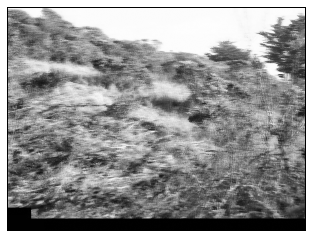

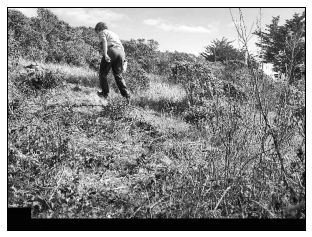

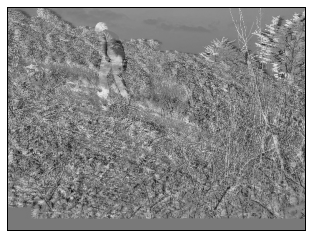

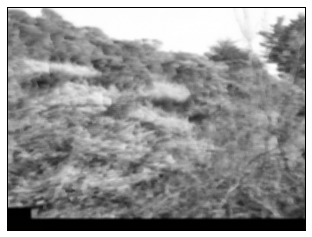

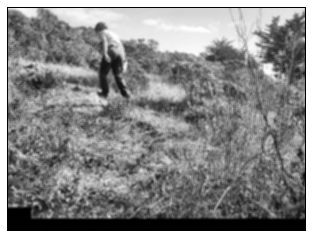

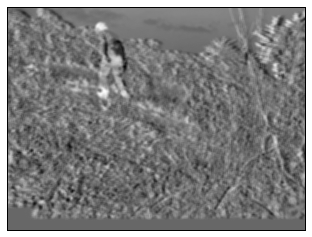

In [370]:
imid=47
plt.xticks([]), plt.yticks([])
plt.imshow(medim,cmap='gray',interpolation = 'bicubic')
plt.show()
plt.xticks([]), plt.yticks([])
plt.imshow(imcube[:,:,imid],cmap='gray',interpolation = 'bicubic')
plt.show()
plt.xticks([]), plt.yticks([])
plt.imshow(medim-imcube[:,:,imid],cmap='gray',interpolation = 'bicubic')
plt.show()
plt.xticks([]), plt.yticks([])
plt.imshow(medblur,cmap='gray',interpolation = 'bicubic')
plt.show()
plt.xticks([]), plt.yticks([])
plt.imshow(imblur[:,:,imid],cmap='gray',interpolation = 'bicubic')
plt.show()
plt.xticks([]), plt.yticks([])
plt.imshow(medblur-imblur[:,:,imid],cmap='gray',interpolation = 'bicubic')
plt.show()

In [262]:
poslist = glob.glob("/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/Positives/Resized/*.JPG")
numpos=len(poslist)
poscube=np.empty([388,518])
for i in range(numpos):
    img = cv2.cvtColor( cv2.imread(poslist[i]), cv2.COLOR_RGB2GRAY )
    poscube=np.dstack((poscube,img))
poscube=np.delete(poscube,0,2)

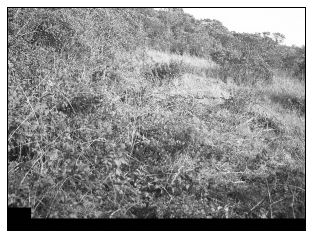

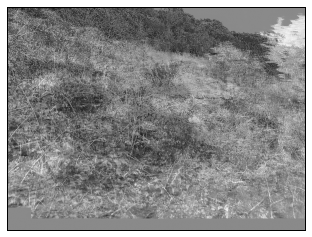

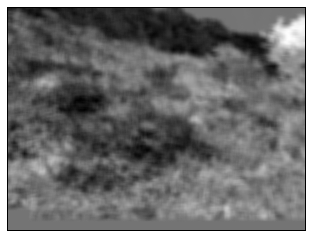

In [266]:
plt.xticks([]), plt.yticks([])
plt.imshow(poscube[:,:,0],cmap='gray',interpolation = 'bicubic')
plt.show()

plt.xticks([]), plt.yticks([])
plt.imshow(poscube[:,:,0]-medim,cmap='gray',interpolation = 'bicubic')
plt.show()
plt.xticks([]), plt.yticks([])
plt.imshow(cv2.blur(poscube[:,:,0],(10,10))-cv2.blur(medim,(10,10)),cmap='gray',interpolation = 'bicubic')
plt.show()

In [508]:
### calculating the similarity between the medblur image and the other images.
method=cv2.cv.CV_COMP_CORREL
histmedblur = cv2.calcHist([np.array(medblur,dtype = np.uint16)],[0],None,[256],[0,256])
histmedblur = cv2.normalize(histmedblur).flatten()
d=[]
stdscore=[]
for i in range(numim):
    hist = cv2.calcHist([np.array(imblur[:,:,i],dtype = np.uint16)],[0],None,[256],[0,256])
    hist = cv2.normalize(hist).flatten()
    d = np.append(d,cv2.compareHist(histmedblur[5:250],hist[5:250], method))
    stdscore=np.append(stdscore,np.std(imblur[:,:,i]-medblur))

0.239767675583
0.132900517013
0.359378140894


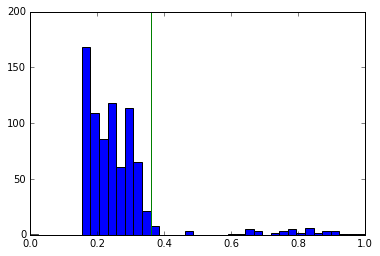

In [525]:
fscore=stdscore+1.0/d
fscore_norm=fscore/np.max(fscore)
plt.hist(fscore_norm,bins=np.linspace(0,1,40))
print np.median(fscore_norm)
print np.std(fscore_norm)
thres=np.median(fscore_norm)+0.9*np.std(fscore_norm)
print thres
plt.plot([thres,thres],[0,200])


In [526]:
id=np.where((fscore_norm >= thres))
print id
print np.array(imlist)[id]

(array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 51, 52, 53]),)
[ '/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/Negatives/Resized/SM-1_20141226 (2953)_Resized.JPG'
 '/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/Negatives/Resized/SM-1_20141226 (2954)_Resized.JPG'
 '/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/Negatives/Resized/SM-1_20141226 (2955)_Resized.JPG'
 '/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/Negatives/Resized/SM-1_20141226 (2956)_Resized.JPG'
 '/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/Negatives/Resized/SM-1_20141226 (2957)_Resized.JPG'
 '/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/Negatives/Resized/SM-1_20141226 (2958)_Resized.JPG'
 '/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/Negatives/Resized/SM-1_201412

(512,)


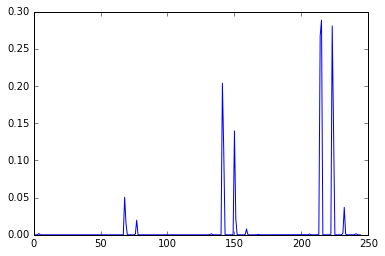

In [501]:
img = cv2.imread(imlist[7])
imgblur=cv2.blur(img,(5,5))

hist = cv2.calcHist([np.array(imblur[:,:,7],dtype = np.uint16)],[0],None,[256],[0,256])
hist = cv2.normalize(hist).flatten()
histmedblur = cv2.calcHist([np.array(medblur,dtype = np.uint16)],[0],None,[256],[0,256])
histmedblur = cv2.normalize(histmedblur).flatten()
histimg = cv2.calcHist([imgblur],[0,1,2],None,[8,8,8],[0,256,0,256,0,256])
histimg = cv2.normalize(histimg).flatten()
print np.shape(histimg)
#plt.plot(np.arange(245),hist[5:250])
#plt.plot(np.arange(245),histmedblur[5:250])
plt.plot(np.arange(245),histimg[5:250])
#plt.plot([215,215],[0,1])
#hist = cv2.normalize(hist).flatten()

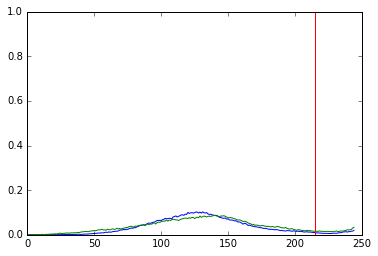

In [488]:
histimg2 = cv2.normalize(histimg2).flatten()
plt.plot(np.arange(245),histmedblur[5:250])
plt.plot(np.arange(245),histimg2[5:250])
plt.plot([215,215],[0,1])

0.965873308585


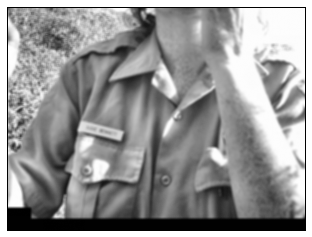

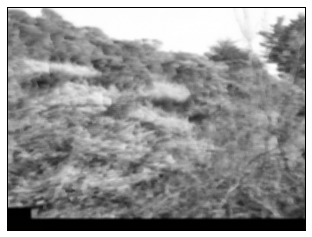

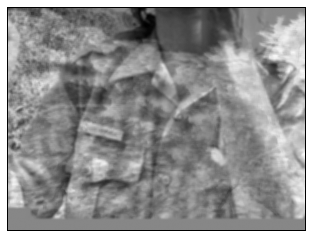

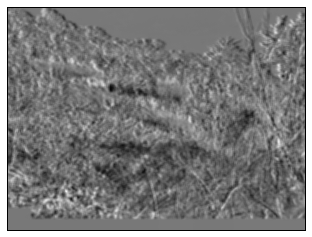

67.0223114009
27.625671577


In [507]:
score=cv2.compareHist(histmedblur[5:250],hist[5:250], method)
print score
plt.xticks([]), plt.yticks([])
plt.imshow(imblur[:,:,7],cmap='gray',interpolation = 'bicubic')
plt.show()
plt.xticks([]), plt.yticks([])
plt.imshow(medblur,cmap='gray',interpolation = 'bicubic')
plt.show()
plt.xticks([]), plt.yticks([])
plt.imshow(imblur[:,:,7]-medblur,cmap='gray',interpolation = 'bicubic')
plt.show()
plt.xticks([]), plt.yticks([])
plt.imshow(imblur[:,:,0]-medblur,cmap='gray',interpolation = 'bicubic')
plt.show()
print np.std(imblur[:,:,7]-medblur)
print np.std(imblur[:,:,0]-medblur)

### Outline of the above analysis
>- Extracting the metadata for all images in one bash
>- Categorize them based on the Date, Lon & Lat coordinates
>- Downsample images from [1944, 2592] to [388,518] so it's more managable. 
>- Convert them to Grayscale
>- Mask the region in the image that contains the logo of the company 
>- Save them in a separate directory
>- Images taken during day/night time must be separated too but I couldn't find any metadata related to that. So, I have to process the image itself. Night times images have identical RGB layers!
>- Working with only Day time images for now
>- Adjusting the contrast locally to it covers the whole dynamical range between [0,255] 
>- Blur them by a box kernel with [5,5] in dimention. This will reduce the effect of noise as well as minor movements of leaves in the image.
>- Calculate a median blured image
>- Calculate the histogram of all blured images with 255 bins. This include the histogram of the median image as well.
>- Calculate the cross correlation similarity metric between the histogram of each image and the median image.
>- Subtract each blured image from the median blured image.
>- Calculate the stddev of the subtracted image.
>- Add the inverse of the similarity metric to the std of each image and call it a finalscore.
>- By analysing the distribution of the finalscore, assign a threshold that separates identical photos from the ones with human+animal contribution.
>- For date= 2014:11:12, the threshold >= median(finalscore)+0.9*std(finalscore) is doing a great job

### Testing the above outline on another date

In [35]:
index=2
id0=np.where(dates== uniquedate[index])
print dates[id0][0]
dir='/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/Negatives/Resized/'
name=dir+dates[id0][0]
if os.path.isdir(name):
    shutil.rmtree(name)
os.mkdir(name)
lenad=len('/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/Negatives/')
sx=1944
sy=2592
dx=sx/5
dy=sy/5
for i in range(len(id0[0])):
    im=cv2.imread(files[id0[0][i]])
    im[1744:1944,0:209,:]=0
    im[1840:1944,:,:]=0
    imresized = cv2.resize(im, (dy, dx),interpolation=cv2.INTER_NEAREST) 
    cv2.imwrite(name+'/'+files[id0[0][i]][lenad:-4]+'_Resized.JPG',imresized)

2014:11:15


In [36]:
index=2
idpos0=np.where(datepos== uniquedatepos[index])
dirpos='/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/Positives/Resized/'
namepos=dirpos+datepos[idpos0][0]
if os.path.isdir(namepos):
    shutil.rmtree(namepos)
os.mkdir(namepos)
lenpos=len('/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/Positives/')
sx=1944
sy=2592
dx=sx/5
dy=sy/5
for i in range(len(idpos0[0])):
    im=cv2.imread(filepos[idpos0[0][i]])
    im[1744:1944,0:209,:]=0
    im[1840:1944,:,:]=0
    imresized = cv2.resize(im, (dy, dx),interpolation=cv2.INTER_NEAREST) 
    cv2.imwrite(namepos+'/'+filepos[idpos0[0][i]][lenpos:-4]+'_Resized.JPG',imresized)

In [37]:
imlist = glob.glob(name+"/*.JPG")
numim=len(imlist)
imcube=np.empty([388,518])
for i in range(numim):
    img = cv2.cvtColor( cv2.imread(imlist[i]), cv2.COLOR_RGB2GRAY )
    # create a CLAHE object (Arguments are optional). Contrast Limited Adaptive Histogram Equalization
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    cl1 = clahe.apply(img)
    imcube=np.dstack((imcube,cl1))
imcube=np.delete(imcube,0,2)

In [42]:
medim=np.median(imcube,axis=2)
imblur=np.empty([388,518])
for i in range(numim):
    imblur=np.dstack((imblur,cv2.blur(imcube[:,:,i],(5,5))))
imblur=np.delete(imblur,0,2)
medblur=np.median(imblur,axis=2)

In [43]:
subblur=np.empty([388,518])
subcube=np.empty([388,518])
for i in range(numim):
    subblur=np.dstack((subblur,cv2.subtract(imblur[:,:,i],medblur)))
subblur=np.delete(subblur,0,2)

In [45]:
### calculating the similarity between the medblur image and the other images.
method=cv2.cv.CV_COMP_CORREL
histmedblur = cv2.calcHist([np.array(medblur,dtype = np.uint16)],[0],None,[256],[0,256])
histmedblur = cv2.normalize(histmedblur).flatten()
d=[]
stdscore=[]
for i in range(numim):
    hist = cv2.calcHist([np.array(imblur[:,:,i],dtype = np.uint16)],[0],None,[256],[0,256])
    hist = cv2.normalize(hist).flatten()
    d = np.append(d,cv2.compareHist(histmedblur[5:250],hist[5:250], method))
    stdscore=np.append(stdscore,np.std(imblur[:,:,i]-medblur))

0.49607978169
0.14484555116
0.626440777734


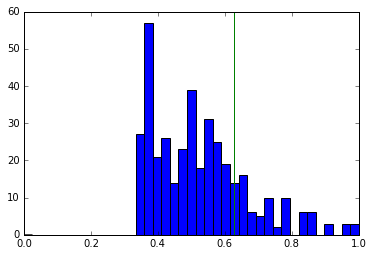

In [58]:
fscore=stdscore+1.0/d
fscore_norm=fscore/np.max(fscore)
plt.hist(fscore_norm,bins=np.linspace(0,1,40))
print np.median(fscore_norm)
print np.std(fscore_norm)
thres=np.median(fscore_norm)+0.9*np.std(fscore_norm)
print thres
plt.plot([thres,thres],[0,60])

[ '/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/Negatives/Resized/2014:11:15/SM-1_20141226 (3750)_Resized.JPG'
 '/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/Negatives/Resized/2014:11:15/SM-1_20141226 (3751)_Resized.JPG'
 '/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/Negatives/Resized/2014:11:15/SM-1_20141226 (3752)_Resized.JPG'
 '/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/Negatives/Resized/2014:11:15/SM-1_20141226 (3753)_Resized.JPG'
 '/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/Negatives/Resized/2014:11:15/SM-1_20141226 (3754)_Resized.JPG'
 '/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/Negatives/Resized/2014:11:15/SM-1_20141226 (3755)_Resized.JPG'
 '/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/Negatives/Resized/2014:11:15/SM-1_20141226 (3756)_Resized.JPG'
 '/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/Negatives/Resized/2014:11:15/SM-1_20141226 (3757)_Resi

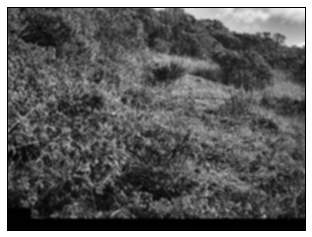

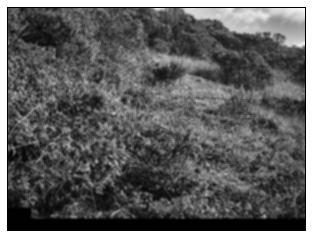

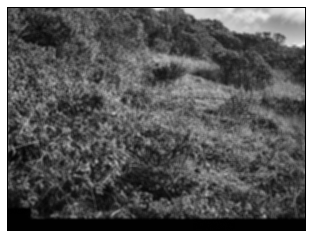

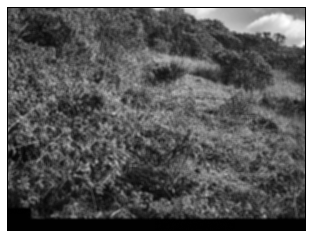

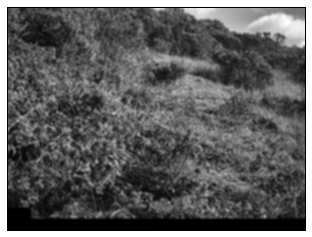

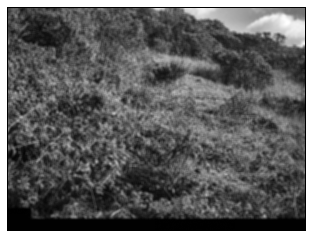

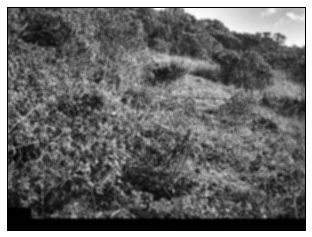

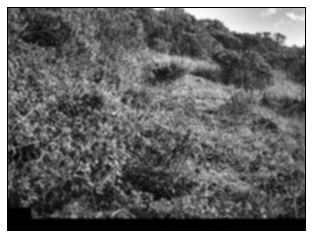

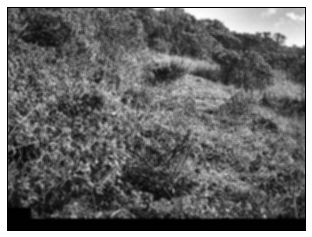

In [67]:
id=np.where(fscore_norm >=0.9)[0]
print np.array(imlist)[id]
for i in id:
    plt.xticks([]), plt.yticks([])
    plt.imshow(imblur[:,:,i],cmap='gray',interpolation = 'bicubic')
    plt.show()

[ '/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/Negatives/Resized/2014:11:15/SM-1_20141226 (3905)_Resized.JPG'
 '/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/Negatives/Resized/2014:11:15/SM-1_20141226 (3938)_Resized.JPG'
 '/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/Negatives/Resized/2014:11:15/SM-1_20141226 (3942)_Resized.JPG'
 '/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/Negatives/Resized/2014:11:15/SM-1_20141226 (3943)_Resized.JPG'
 '/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/Negatives/Resized/2014:11:15/SM-1_20141226 (3944)_Resized.JPG'
 '/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/Negatives/Resized/2014:11:15/SM-1_20141226 (3951)_Resized.JPG'
 '/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/Negatives/Resized/2014:11:15/SM-1_20141226 (3953)_Resized.JPG']


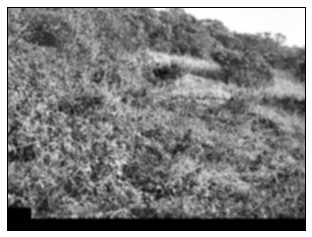

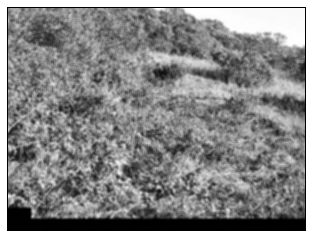

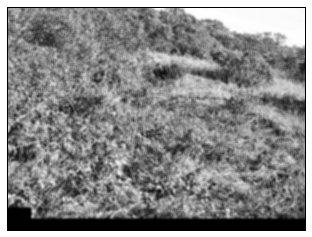

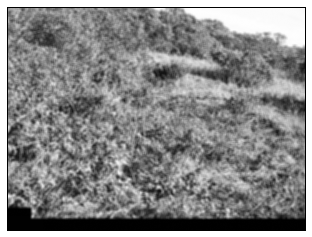

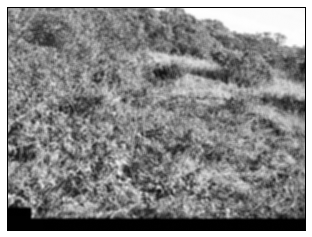

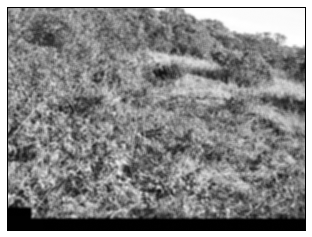

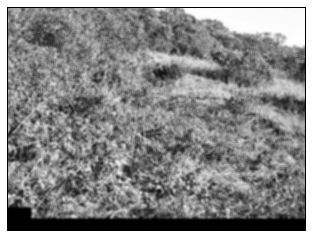

In [68]:
id=np.where(fscore_norm <=0.35)[0]
print np.array(imlist)[id]
for i in id:
    plt.xticks([]), plt.yticks([])
    plt.imshow(imblur[:,:,i],cmap='gray',interpolation = 'bicubic')
    plt.show()

### Conclusion
In this new set of images there is no moving target. Obviously the histogram if the final score looks different. The normalized median value is larger and the the assymetric distribution has a continuus tail. It turns out that images with larger dissimilarity scores in this set have clouds in the upper right corner! 

The bottom line is I need to select ~15% of images with largest dissimilarity scores and do more extensive analysis on them. The small set of images makes it possible to do more sophiscated object detection and ML classification.

### Test
I want to test 3 images that do have an animal from the same scene but apparently captured in a different day during sunset!

In [69]:
namefox='/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/Good REPS/Resized/'
filefox = glob.glob("/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/Good REPS/*.JPG")

if os.path.isdir(namefox):
    shutil.rmtree(namefox)
os.mkdir(namefox)
lenfox=len('/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/Good REPS/')
sx=1944
sy=2592
dx=sx/5
dy=sy/5
for i in range(3):
    im=cv2.imread(filefox[i])
    im[1744:1944,0:209,:]=0
    im[1840:1944,:,:]=0
    imresized = cv2.resize(im, (dy, dx),interpolation=cv2.INTER_NEAREST) 
    cv2.imwrite(namefox+'/'+filefox[i][lenfox:-4]+'_Resized.JPG',imresized)

In [70]:
foxlist = glob.glob(namefox+"/*.JPG")
numfox=len(foxlist)
foxcube=np.empty([388,518])
for i in range(numfox):
    img = cv2.cvtColor( cv2.imread(foxlist[i]), cv2.COLOR_RGB2GRAY )
    # create a CLAHE object (Arguments are optional). Contrast Limited Adaptive Histogram Equalization
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    cl1 = clahe.apply(img)
    foxcube=np.dstack((foxcube,cl1))
foxcube=np.delete(foxcube,0,2)

In [71]:
foxblur=np.empty([388,518])
for i in range(numfox):
    foxblur=np.dstack((foxblur,cv2.blur(foxcube[:,:,i],(5,5))))
foxblur=np.delete(foxblur,0,2)

subfoxblur=np.empty([388,518])
subfoxcube=np.empty([388,518])
for i in range(numfox):
    subfoxblur=np.dstack((subfoxblur,cv2.subtract(foxblur[:,:,i],medblur)))
subfoxblur=np.delete(subfoxblur,0,2)


In [73]:
### calculating the similarity between the medblur image and the fox images.
method=cv2.cv.CV_COMP_CORREL
dfox=[]
stdfoxscore=[]
for i in range(numfox):
    hist = cv2.calcHist([np.array(foxblur[:,:,i],dtype = np.uint16)],[0],None,[256],[0,256])
    hist = cv2.normalize(hist).flatten()
    dfox = np.append(dfox,cv2.compareHist(histmedblur[5:250],hist[5:250], method))
    stdfoxscore=np.append(stdfoxscore,np.std(foxblur[:,:,i]-medblur))

0.322922354801
0.10712593516
0.419335696445


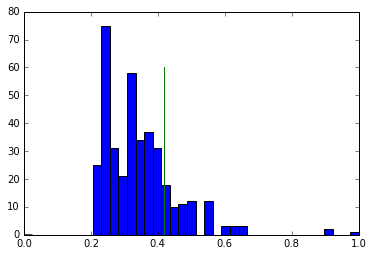

In [82]:
dfox2=np.append(d,dfox)
std2=np.append(stdscore,stdfoxscore)
foxscore=std2+1.0/dfox2
foxscore_norm=foxscore/np.max(foxscore)
plt.hist(foxscore_norm,bins=np.linspace(0,1,40))
print np.median(foxscore_norm)
print np.std(foxscore_norm)
thres=np.median(foxscore_norm)+0.9*np.std(foxscore_norm)
print thres
plt.plot([thres,thres],[0,60])

In [85]:
id=np.where(foxscore_norm >=0.8)[0]
print id
print len(foxscore_norm)

[384 385 386]
387


### The result is perfect

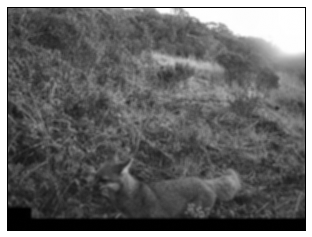

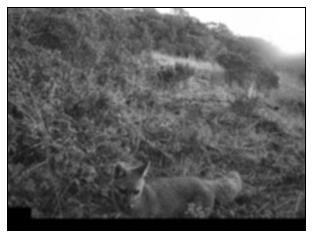

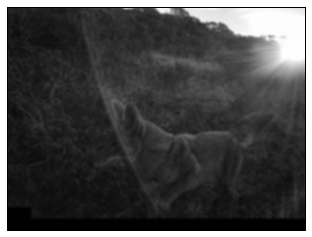

In [86]:
for i in range(3):
    plt.xticks([]), plt.yticks([])
    plt.imshow(foxblur[:,:,i],cmap='gray',interpolation = 'bicubic')
    plt.show()